<a href="https://colab.research.google.com/github/vhrique/anne2024/blob/main/02_Aprendizagem_Supervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes Utilizados nesta Aula

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_diabetes
from torch.utils.data import DataLoader, TensorDataset

# Paradigmas de Aprendizagem

Os paradigmas de aprendizagem em redes neurais artificiais (RNAs) s√£o baseados em diferentes maneiras de treinar um modelo e interagir com os dados.
De forma geral, existem tr√™s paradigmas principais: aprendizagem supervisionada, aprendizagem n√£o supervisionada e aprendizagem por refor√ßo.
Cada um desses paradigmas possui m√©todos distintos de treinar modelos, com base na disponibilidade e tipo de dados, bem como no objetivo final da tarefa.

Na aprendizagem supervisionada, o modelo aprende a partir de dados rotulados, tentando prever uma sa√≠da correta com base em entradas espec√≠ficas.

<center><img src="https://github.com/vhrique/anne2024/blob/main/figures/supervised.jpg?raw=true" width="500"></center>

J√° na aprendizagem n√£o supervisionada, os dados n√£o possuem r√≥tulos, e o modelo busca identificar padr√µes ou estruturas nos dados, como clusters ou associa√ß√µes.

<center><img src="https://github.com/vhrique/anne2024/blob/main/figures/clustering.jpg?raw=true" width="500"></center>

Por fim, na aprendizagem por refor√ßo, o modelo aprende atrav√©s da intera√ß√£o com um ambiente, recebendo recompensas ou penalidades com base nas a√ß√µes tomadas, ajustando seu comportamento para maximizar a recompensa ao longo do tempo.

<center><img src="https://github.com/vhrique/anne2024/blob/main/figures/reinforcement.jpg?raw=true" width="300"></center>

# Aprendizagem Supervisionada

Entre os paradigmas de aprendizagem mais relevantes est√° a aprendizagem supervisionada, que ser√° o foco desta aula.

Na aprendizagem supervisionada, o modelo √© treinado utilizando um conjunto de dados rotulados, ou seja, para cada entrada, h√° uma sa√≠da esperada conhecida.
O objetivo do modelo √© aprender uma fun√ß√£o que mapeia as entradas para as sa√≠das corretas, generalizando esse conhecimento para prever novas amostras.
Esse paradigma √© amplamente aplicado em tarefas de classifica√ß√£o e regress√£o.

## Problemas de Classifica√ß√£o

Na classifica√ß√£o, o modelo aprende a categorizar entradas em uma ou mais classes.
Um exemplo cl√°ssico √© a classifica√ß√£o de imagens de d√≠gitos escritos √† m√£o, onde o modelo deve identificar corretamente o d√≠gito (0 a 9) de uma imagem.
O modelo aprende a identificar padr√µes que distinguem uma classe de outra.

As tr√™s principais categorias de classifica√ß√£o s√£o classifica√ß√£o bin√°ria, classifica√ß√£o multiclasse e classifica√ß√£o multilabel. Cada uma tem suas pr√≥prias caracter√≠sticas e desafios.

### Classifica√ß√£o Bin√°ria

Na classifica√ß√£o bin√°ria, o modelo tem que decidir entre duas classes poss√≠veis.
Por exemplo, um modelo pode classificar e-mails como "spam" ou "n√£o spam". As sa√≠das s√£o representadas por um √∫nico valor, geralmente 0 ou 1, onde 0 pode significar "classe negativa" e 1 "classe positiva".
A fun√ß√£o de ativa√ß√£o mais comum usada para esse tipo de problema √© a sigmoide, que gera uma probabilidade entre 0 e 1.
A fun√ß√£o de perda mais utilizada √© a Binary Cross-Entropy (BCE).

### Classifica√ß√£o Multiclasse

Na classifica√ß√£o multiclasse, o modelo precisa classificar as entradas em mais de duas classes mutuamente exclusivas.
Um exemplo cl√°ssico √© a classifica√ß√£o de imagens de d√≠gitos escritos √† m√£o, onde cada d√≠gito (0 a 9) √© uma classe diferente.
Nesse caso, o modelo produz uma √∫nica sa√≠da que corresponde a uma das classes.
A fun√ß√£o de ativa√ß√£o comumente usada para multiclasse √© a softmax, que normaliza as sa√≠das para que elas somem 1, permitindo a interpreta√ß√£o dessas sa√≠das como probabilidades.
A fun√ß√£o de perda mais comum √© a Cross-Entropy (entropia cruzada).

### Classifica√ß√£o Multilabel

Na classifica√ß√£o multilabel, cada entrada pode pertencer simultaneamente a v√°rias classes, ou seja, as classes n√£o s√£o mutuamente exclusivas.
Por exemplo, um sistema de recomenda√ß√£o de filmes pode classificar um filme tanto como "com√©dia" quanto "drama", ou uma imagem pode conter v√°rios objetos diferentes, como "gato", "carro" e "√°rvore".
Nesse caso, o modelo produz v√°rias sa√≠das, uma para cada poss√≠vel classe, e cada sa√≠da √© tratada como um problema de classifica√ß√£o bin√°ria (ou seja, uma classe pode estar presente ou n√£o).
Aqui, a sigmoide √© usada em cada sa√≠da, com a fun√ß√£o de perda Binary Cross-Entropy aplicada individualmente para cada classe.

### Exemplo de Classifica√ß√£o

Vejamos um problema de classifica√ß√£o multiclasse simples.
Desta vez, trabalharemos com um dataset famoso, o Iris Dataset de Fisher (1936).

Al√©m disto, agora vamos utilizar valida√ß√£o cruzada para avaliar o modelo. Utilizaremos uma t√©cnica chamada de _Holdout Cross-validation_, que separa os dados de treino e teste de forma aleat√≥ria.

Obs: Ainda n√£o estamos levando em considera√ß√£o um conjunto de valida√ß√£o, onde podemos controlar o treinamento e realizar _early stopping_. Veremos isto no futuro.

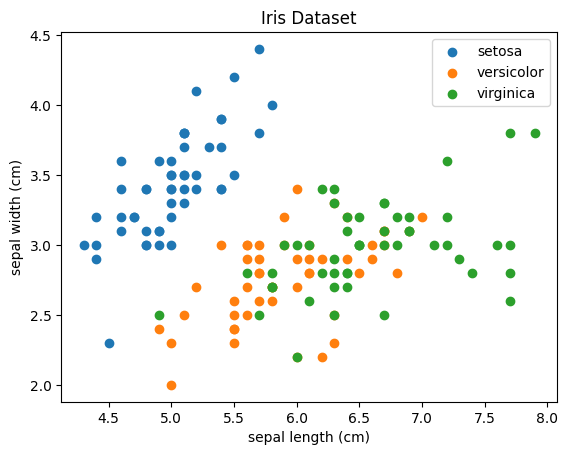

In [138]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

for target in np.unique(y):
    plt.scatter(X[y == target,0], X[y == target,1])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names)
plt.title('Iris Dataset')
plt.show()

Preparamos o modelo e a rotina de treinamento conforme os materiais da [Aula 01.A: Fundamentos de Pytorch](https://github.com/vhrique/anne2024/blob/main/01a_Fundamentos_de_Pytorch.ipynb).

Por√©m, modificamos o modelo para ter quatro entradas e tr√™s sa√≠das, conforme o problema que iremos resolver, que possui quatro atributos e tr√™s classes.

Tamb√©m utilizaremos outra fun√ß√£o de perda, a entropia cruzada categ√≥rica.

In [139]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer = torch.nn.Linear(input_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 3)

    def forward(self, x):
        x = torch.nn.functional.sigmoid(self.hidden_layer(x))
        return self.output_layer(x)

In [144]:
model = MLP(4, 10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

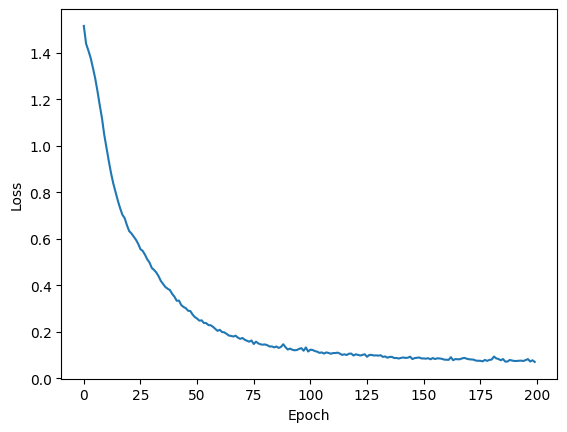

In [145]:
num_epochs = 200
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Finalizado o treino, vamos analisar o resultado.
Abaixo temos m√©tricas de avalia√ß√£o de classifica√ß√£o mostrando os resultados para o conjunto de treino. Relembrando, ao avaliar o erro no conjunto de treino, estamos realizando ressubstitui√ß√£o. Vemos nisto uma acur√°cia alta, de 99%. Tamb√©m conseguimos verificar a precis√£o (_precision_) e a sensibilidade (_recall_) para cada classe.

In [146]:
with torch.no_grad():
    outputs = model(X_train)

print(
    classification_report(
        y_train.detach().numpy(),
        outputs.detach().numpy().argmax(axis=1),
        target_names=iris.target_names
    )
)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       1.00      0.98      0.99        42
   virginica       0.97      1.00      0.99        37

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Perceba que, ao avaliar a sa√≠da, utilizamos o m√©todo _argmax_. O objetivo disto √© detectar a classe cuja sa√≠da possui maior ativa√ß√£o.

Em seguida, realizamos a avalia√ß√£o da classifica√ß√£o no conjunto de teste, onde temos amostras que o modelo n√£o viu durante o treino. Aqui, vemos uma acur√°cia mais baixa, de 97%. Esta diferen√ßa entre o conjunto de treino e teste √© comum, e √© um indicativo da capacidade de generaliza√ß√£o do modelo. Nosso objetivo final √© generalizar. Portanto, buscamos a maior acur√°cia poss√≠vel no conjunto de testes.

Caso criemos um modelo muito complexo e treinemos por muito tempo, corremos um grande risco de realizar _overfitting_ no conjunto de treino. Nesta situa√ß√£o, a capacidade preditiva no conjunto de treino √© muito alta. Por√©m, isto vem com um custo de uma capacidade preditiva mais baixa no conjunto de testes.

In [147]:
with torch.no_grad():
    outputs = model(X_test)

print(
    classification_report(
        y_test.detach().numpy(),
        outputs.detach().numpy().argmax(axis=1),
        target_names=iris.target_names
    )
)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Problemas de Regress√£o

Na regress√£o, o objetivo √© prever um valor cont√≠nuo.
Por exemplo, em problemas de previs√£o de temperatura, o modelo aprende a mapear uma s√©rie de vari√°veis (como press√£o e umidade) para prever a temperatura futura.
Ao contr√°rio da classifica√ß√£o, onde as sa√≠das s√£o discretas, a regress√£o lida com vari√°veis cont√≠nuas.

Vejamos um exemplo relacionado √† detec√ß√£o de diabetes.

In [129]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Vamos aqui adicionar uma nova camada oculta ao modelo, com o objetivo de extrair mais atributos dos sinais de entrada com a rede neural.

In [130]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.hidden_layer1(x))
        x = torch.nn.functional.relu(self.hidden_layer2(x))
        return self.output_layer(x)

In [131]:
model = MLP(10, 100)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

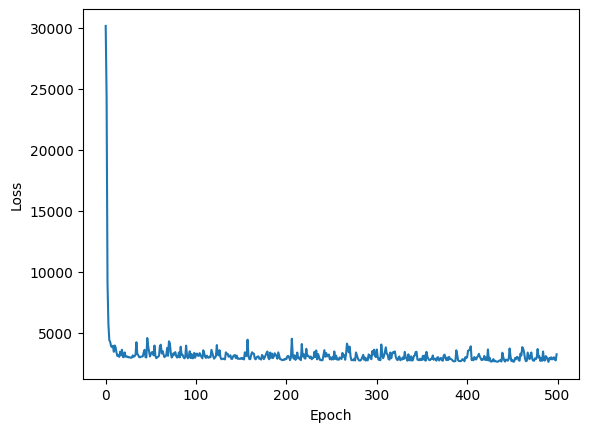

In [132]:
num_epochs = 500
loss_logs = []

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(train_dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Ap√≥s o treino, analisamos o resultado por resubstitui√ß√£o. Neste exemplo, estamos analisando a raiz do erro quadr√°tico m√©dio (_root mean squared error_), uma m√©trica comum em problemas de regress√£o.

Tamb√©m plotamos o gr√°fico de regress√£o, que indica qual a previs√£o do modelo no eixo vertical para os valores esperados no eixo horizontal. Quanto melhor as previs√µes, mais pr√≥ximos da linha diagonal preta estar√£o os pontos azuis das amostras.

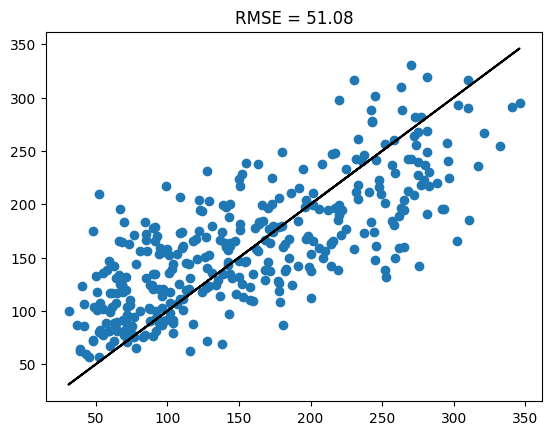

In [136]:
with torch.no_grad():
    outputs = model(X_train)

plt.scatter(y_train, outputs)
plt.plot(y_train, y_train, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs, y_train).item()):.2f}')
plt.show()

Analisamos, por fim, os resultados no conjunto de teste, mostrando um RMSE pr√≥ximo ao conjunto de treino.

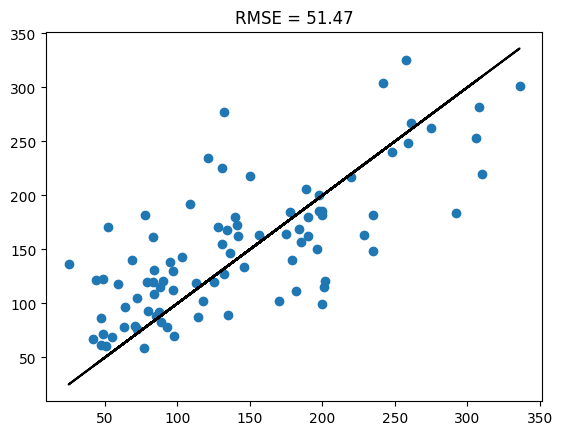

In [137]:
with torch.no_grad():
    outputs = model(X_test)

plt.scatter(y_test, outputs)
plt.plot(y_test, y_test, 'k')
plt.title(f'RMSE = {np.sqrt(criterion(outputs, y_test).item()):.2f}')
plt.show()

# Fun√ß√µes de Perda

As fun√ß√µes de perda (ou fun√ß√µes de custo) s√£o componentes centrais no treinamento de redes neurais, pois medem o qu√£o bem o modelo est√° performando.
Elas comparam as predi√ß√µes feitas pela rede com os valores reais e retornam um valor num√©rico que indica o erro da previs√£o.
O objetivo do treinamento √© minimizar essa fun√ß√£o de perda ajustando os pesos da rede, com a ajuda de algoritmos de otimiza√ß√£o, para que o erro se torne o menor poss√≠vel.

Essencialmente, a fun√ß√£o de perda informa √† rede neural como melhorar suas predi√ß√µes ao longo do processo de aprendizado.
Dependendo do tipo de problema (classifica√ß√£o, regress√£o, multiclasse, etc.), diferentes fun√ß√µes de perda s√£o utilizadas.

## Fun√ß√µes de Perda para Classifica√ß√£o

### Binary Cross-Entropy

A Binary Cross-Entropy (BCE) √© comumente usada em problemas de classifica√ß√£o bin√°ria, onde o objetivo √© prever se uma amostra pertence a uma de duas classes.
Essa fun√ß√£o mede a diferen√ßa entre a probabilidade prevista e o valor real, penalizando fortemente predi√ß√µes erradas. A f√≥rmula √©:

$$
\text{BCE} = - \frac{1}{N}\sum_{i=1}^{N}\left[y_i.log(\hat{y}_i) + (1 - y_i).log(1-\hat{y}_i)\right]
$$

Aqui, $y_i$ √© o valor real (0 ou 1) e $\hat{y}_i$ √© a probabilidade prevista.
O objetivo √© minimizar essa diferen√ßa, fazendo com que a probabilidade prevista se aproxime do valor real.

- Vantagem: Funciona muito bem com problemas bin√°rios, lidando com probabilidades.
- Desvantagem: Pode ser mais sens√≠vel a problemas de balan√ßo de classes.



#### Multilabel Binary Cross-Entropy

Em problemas de classifica√ß√£o multilabel, onde uma entrada pode pertencer a mais de uma classe, a Multilabel Binary Cross-Entropy √© utilizada.
√â basicamente a BCE aplicada a cada r√≥tulo individualmente.
A f√≥rmula √© semelhante √† da BCE, mas ajustada para v√°rias sa√≠das simult√¢neas.

- Vantagem: Adequada para problemas onde uma entrada pertence a m√∫ltiplas classes.
- Desvantagem: Pode se tornar ineficiente com um grande n√∫mero de classes.

### Categorical Cross-Entropy

A Entropia Cruzada Categ√≥rica √© usada em problemas de classifica√ß√£o multiclasse, onde o objetivo √© prever uma entre v√°rias classes mutuamente exclusivas.
A f√≥rmula √©:

$$
\text{CCE} = - \frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{C}y_{ij}.log(\hat{y}_{ij})
$$

Aqui, $C$ √© o n√∫mero de classes, $y_{ij}$ √© o valor real (geralmente um vetor one-hot) e $\hat{y}_{ij}$ √© a probabilidade prevista para a classe $j$.
A _softmax_ √© usada como fun√ß√£o de ativa√ß√£o na sa√≠da, convertendo as predi√ß√µes em probabilidades.

- Vantagem: Adequada para problemas com v√°rias classes exclusivas.
- Desvantagem: N√£o lida bem com situa√ß√µes em que uma inst√¢ncia pode pertencer a m√∫ltiplas classes.

### Cross-Entropy como Fun√ß√£o de Perda em Redes Neurais

A entropia cruzada (cross-entropy) tem suas origens na teoria da informa√ß√£o, desenvolvida por Claude Shannon na d√©cada de 1940.
A ideia central da teoria da informa√ß√£o √© quantificar a quantidade de informa√ß√£o ou incerteza presente em um conjunto de dados, e a entropia √© uma medida dessa incerteza.
A entropia de Shannon mede o grau de imprevisibilidade de um sistema de eventos, sendo usada para descrever a incerteza associada a uma distribui√ß√£o de probabilidades.

No contexto de redes neurais, a entropia cruzada √© uma medida da diverg√™ncia entre duas distribui√ß√µes de probabilidade: a distribui√ß√£o verdadeira dos r√≥tulos (a sa√≠da correta) e a distribui√ß√£o prevista pelo modelo.
A f√≥rmula original da entropia cruzada √© baseada na diverg√™ncia de Kullback-Leibler (KL Divergence), que mede a diferen√ßa entre duas distribui√ß√µes de probabilidade $P$ e $Q$.
No caso de uma rede neural, $P$ √© a distribui√ß√£o verdadeira dos r√≥tulos (normalmente representada por um vetor one-hot) e $Q$ √© a distribui√ß√£o de probabilidade prevista pelo modelo.

A f√≥rmula da entropia cruzada √© dada por:

$$
H(P,Q) = - \sum_{i=1}^{C}P(i)log(Q(i))
$$

Onde:

- $P(i)$ √© a probabilidade verdadeira para a classe $i$ (em problemas de classifica√ß√£o, geralmente 0 ou 1).
- $Q(i)$ √© a probabilidade prevista pelo modelo para a classe $i$.

A entropia cruzada mede o qu√£o bem o modelo est√° capturando a distribui√ß√£o verdadeira dos r√≥tulos.
Quando $P(i)$ √© 1 (ou seja, a classe $ùëñ$ √© a correta), a entropia cruzada penaliza o modelo se a probabilidade $ùëÑ(i)$ n√£o estiver pr√≥xima de 1.

### Margin (Hinge)

O Hinge Loss √© usado com m√°quinas de vetores de suporte (SVMs), mas tamb√©m pode ser aplicado em redes neurais para problemas de classifica√ß√£o bin√°ria.
Ele for√ßa o modelo a maximizar a margem entre as classes, penalizando erros de classifica√ß√£o de forma mais agressiva.

A f√≥rmula para um problema bin√°rio √©:

$$
L = \sum_{i=1}^{N}\text{max}(0,1-y_i.\hat{y}_i)
$$

Aqui, $y_i$ s√£o os r√≥tulos reais (+1 ou -1), $\hat{y}_{i}$ e s√£o as predi√ß√µes do modelo.

- Vantagem: Eficaz em maximizar a separa√ß√£o entre as classes.
- Desvantagem: Principalmente usado em SVMs e menos comum em redes neurais.

### Mean Squared Error

O MSE √© amplamente usado em problemas de regress√£o, onde o objetivo √© prever valores cont√≠nuos.
Ele mede a diferen√ßa m√©dia entre as predi√ß√µes do modelo e os valores reais, elevando ao quadrado essas diferen√ßas para garantir que erros positivos e negativos n√£o se cancelem.
A f√≥rmula √©:

$$
\text{MSE} = \frac{1}{N}\sum_{i=1}^N(y_i - \hat{y}_i)^2
$$

onde $y_i$ √© o valor real e $\hat{y}_i$ √© a predi√ß√£o do modelo.
O quadrado das diferen√ßas garante que erros grandes tenham um impacto maior no valor final.

- Vantagem: Simples de calcular e amplifica grandes erros.
- Desvantagem: Sens√≠vel a outliers, j√° que erros grandes t√™m um impacto desproporcional.

### Mean Absolute Error

O MAE √© outra fun√ß√£o de perda usada para problemas de regress√£o, mas, ao contr√°rio do MSE, mede a diferen√ßa absoluta m√©dia entre os valores previstos e os valores reais.
Sua f√≥rmula √©:

$$
\text{MSE} = \frac{1}{N}\sum_{i=1}^N \left|y_i - \hat{y}_i \right|
$$

- Vantagem: Mais robusto a outliers do que o MSE.
- Desvantagem: N√£o diferencia grandes e pequenos erros da mesma forma que o MSE.

### Huber Loss

A Huber Loss √© uma fun√ß√£o de perda que combina as vantagens do Erro Quadr√°tico M√©dio (MSE) e do Erro Absoluto M√©dio (MAE), oferecendo uma abordagem robusta para problemas de regress√£o, especialmente na presen√ßa de outliers.
Ela foi projetada para tratar grandes erros de forma mais eficiente do que o MSE, que √© altamente sens√≠vel a outliers, enquanto mant√©m a simplicidade do MAE em regi√µes de pequenos erros.
A f√≥rmula da Huber Loss √© definida de forma diferente para erros pequenos e grandes:

$$
L_{\delta}(y_i, \hat{y}_i) =
\begin{cases}
\frac{1}{2}(y_i - \hat{y}_i)^2 & \text{se } |y_i - \hat{y}_i| \leq \delta \\
\delta \cdot (|y_i - \hat{y}_i| - \frac{1}{2} \delta) & \text{se } |y_i - \hat{y}_i| > \delta
\end{cases}
$$

onde $y_i$ √© o valor real, $\hat{y}_i$ √© a previs√£o do modelo e $\delta$ √© um par√¢metro que define o limite entre erros pequenos e grandes.

A Huber Loss funciona de forma suave em rela√ß√£o a pequenos erros, como o MSE, mas trata erros grandes de maneira mais robusta, como o MAE.
Isso faz com que seja uma fun√ß√£o intermedi√°ria que lida bem tanto com ru√≠dos pequenos quanto com outliers, sendo especialmente √∫til em problemas de regress√£o.

Vantagens:

- Robustez a outliers: Quando h√° grandes erros ou outliers, a Huber Loss n√£o amplifica esses erros tanto quanto o MSE, evitando que um pequeno n√∫mero de outliers distor√ßa significativamente o modelo.
- Suavidade em pequenos erros: Para erros pequenos, a Huber Loss se comporta como o MSE, permitindo que a fun√ß√£o de perda seja diferenci√°vel e suave, o que facilita a otimiza√ß√£o.

Desvantagens:

- Escolha de $\delta$: O valor de
$\delta$ deve ser escolhido cuidadosamente, pois um valor mal ajustado pode levar a um comportamento inadequado da fun√ß√£o de perda. Sefor muito pequeno, o modelo se comportar√° quase como o MAE, e se for muito grande, se aproximar√° do MSE, perdendo as vantagens da robustez

A Huber Loss √© amplamente utilizada em problemas de regress√£o onde h√° a presen√ßa de outliers nos dados, pois oferece um equil√≠brio entre ser suave para erros pequenos e robusta para grandes erros. Al√©m disso, √© preferida em aplica√ß√µes de machine learning onde o MSE tende a ser excessivamente influenciado por grandes outliers.

## Outras Fun√ß√µes de Perda

A KL Divergence √© utilizada para medir a diferen√ßa entre duas distribui√ß√µes de probabilidade, sendo particularmente √∫til em modelos probabil√≠sticos, como variational autoencoders (VAEs).
Ela n√£o √© propriamente uma fun√ß√£o de perda no sentido tradicional, mas √© amplamente usada para regularizar a distribui√ß√£o de sa√≠da de um modelo para que seja similar a uma distribui√ß√£o-alvo.

A Cosine Similarity Loss mede o √¢ngulo entre dois vetores, sendo usada para comparar a similaridade entre vetores em vez de medir a diferen√ßa absoluta.
Isso √© especialmente √∫til em problemas de aprendizado de representa√ß√µes, como em redes neurais siamesas e embedding learning.

A Focal Loss foi introduzida para tratar o problema de desbalanceamento de classes, em que algumas classes s√£o muito mais representadas que outras.
Ela √© uma modifica√ß√£o da entropia cruzada que coloca mais peso nas amostras dif√≠ceis (ou seja, aquelas que s√£o classificadas de forma incorreta).

Tamb√©m chamada de Huber Loss, mas com uma implementa√ß√£o ligeiramente diferente, a Smooth L1 Loss √© amplamente utilizada em redes neurais para detec√ß√£o de objetos. Ela √© mais robusta a outliers do que a MSE e mais est√°vel do que o MAE.

A Dice Loss √© uma fun√ß√£o de perda comumente usada em problemas de segmenta√ß√£o de imagens, especialmente em √°reas m√©dicas, onde √© necess√°rio calcular a sobreposi√ß√£o entre a √°rea predita e a √°rea verdadeira.
√â derivada do coeficiente de Dice, que mede a similaridade entre dois conjuntos.

A Triplet Loss √© usada para aprendizado de embeddings e aprendizado m√©trico, particularmente em redes siamesas.
A fun√ß√£o de perda incentiva a rede a reduzir a dist√¢ncia entre embeddings de amostras semelhantes (o ancor e o positivo) e aumentar a dist√¢ncia entre o ancor e amostras dissimilares (o negativo).

A Wing Loss √© uma fun√ß√£o de perda desenhada especificamente para problemas de detec√ß√£o de landmarks faciais, onde pequenos erros precisam ser suavemente penalizados, mas grandes erros devem ser penalizados de forma mais forte.

# Algoritmos de Otimiza√ß√£o

Os algoritmos de otimiza√ß√£o s√£o fundamentais para o processo de aprendizagem de redes neurais, pois determinam como os pesos dos neur√¥nios s√£o ajustados para minimizar a fun√ß√£o de perda durante o treinamento.
O objetivo da otimiza√ß√£o √© encontrar os melhores par√¢metros (pesos e vieses) que permitam √† rede fazer previs√µes precisas em novos dados.

A fun√ß√£o de perda mede o qu√£o longe as previs√µes do modelo est√£o dos valores reais, e o papel do algoritmo de otimiza√ß√£o √© minimizar essa fun√ß√£o ajustando gradualmente os pesos.
Isso √© feito por meio do c√°lculo do gradiente, que indica a dire√ß√£o e a magnitude da mudan√ßa necess√°ria nos pesos.

Agora, vamos explorar alguns dos principais algoritmos de otimiza√ß√£o e suas evolu√ß√µes:

### Gradiente Descendente

O gradiente descendente √© o algoritmo de otimiza√ß√£o mais simples e amplamente utilizado.
Ele funciona ajustando os pesos na dire√ß√£o oposta ao gradiente da fun√ß√£o de perda com rela√ß√£o a esses pesos.
A ideia √© que, ao seguir essa dire√ß√£o de forma iterativa, o algoritmo chegue ao m√≠nimo da fun√ß√£o de perda, onde o modelo realiza as previs√µes mais precisas.

Existem tr√™s varia√ß√µes principais do gradiente descendente:

- Batch Gradient Descent: Calcula o gradiente em todo o conjunto de dados de treinamento antes de atualizar os pesos. Esse m√©todo pode ser lento e ineficiente para grandes conjuntos de dados.
- Stochastic Gradient Descent (SGD): Atualiza os pesos para cada exemplo de treino individual, tornando o processo mais r√°pido, mas introduzindo maior varia√ß√£o nas atualiza√ß√µes.
- Mini-Batch Gradient Descent: Combina os dois anteriores, calculando o gradiente em pequenos lotes de dados, acelerando o treinamento e suavizando a varia√ß√£o das atualiza√ß√µes.

### Momentum

O Momentum foi introduzido como uma melhoria ao gradiente descendente.
Ele acelera o processo de converg√™ncia em dire√ß√£o ao m√≠nimo, acumulando uma fra√ß√£o do gradiente anterior em cada atualiza√ß√£o.
Isso ajuda a suavizar o caminho em dire√ß√£o ao m√≠nimo, evitando oscila√ß√µes, especialmente em dire√ß√µes que t√™m gradientes mais ruidosos.

A ideia √© que, em vez de seguir estritamente a dire√ß√£o do gradiente atual, o modelo leva em conta o "momento" da dire√ß√£o em que est√° se movendo, como uma bola rolando por uma superf√≠cie irregular.
Isso permite que o modelo alcance o m√≠nimo mais rapidamente.

### RMSProp

O RMSProp √© um m√©todo de otimiza√ß√£o adaptativo que ajusta a taxa de aprendizado individualmente para cada par√¢metro, com base na magnitude dos gradientes recentes.
Ele mant√©m uma m√©dia m√≥vel quadrada dos gradientes ao longo do tempo e, ao dividir o gradiente atual por essa m√©dia, corrige a taxa de aprendizado para cada par√¢metro.
Isso faz com que RMSProp se adapte melhor a problemas com gradientes que variam em escalas diferentes.

Essa adapta√ß√£o da taxa de aprendizado para cada peso torna o treinamento mais est√°vel e eficaz, especialmente em problemas como redes neurais profundas, onde as atualiza√ß√µes dos pesos podem variar muito.

### ADAM

O ADAM combina o melhor de dois mundos: as ideias do Momentum e do RMSProp.
Ele calcula uma m√©dia m√≥vel dos gradientes (como o Momentum) e uma m√©dia m√≥vel dos quadrados dos gradientes (como o RMSProp), ajustando a taxa de aprendizado de forma adaptativa para cada par√¢metro.

ADAM tamb√©m inclui uma corre√ß√£o para vi√©s nos primeiros passos, garantindo que as m√©dias m√≥veis comecem corretamente ajustadas.
Esse algoritmo √© um dos mais populares atualmente, pois oferece uma converg√™ncia mais r√°pida e est√°vel em diversos tipos de problemas de redes neurais, sendo menos sens√≠vel √† escolha da taxa de aprendizado inicial.

### Outros Algoritmos

Al√©m dos algoritmos cl√°ssicos que discutimos (Gradiente Descendente, Momentum, RMSProp e ADAM), existem outros algoritmos de otimiza√ß√£o relevantes que, dependendo do problema e das caracter√≠sticas da rede neural, podem oferecer vantagens em termos de desempenho ou converg√™ncia.

O AdaGrad √© um dos primeiros algoritmos de otimiza√ß√£o adaptativos, introduzido antes do RMSProp.
Ele ajusta a taxa de aprendizado para cada par√¢metro de forma individual, com base nas atualiza√ß√µes anteriores.
Isso significa que par√¢metros raramente atualizados t√™m uma taxa de aprendizado maior, enquanto aqueles que j√° foram ajustados v√°rias vezes t√™m a taxa de aprendizado reduzida.
Embora seja √∫til em problemas esparsos, como no processamento de linguagem natural, onde algumas features s√£o raras, AdaGrad pode sofrer de um decaimento excessivo da taxa de aprendizado, o que leva a converg√™ncia mais lenta em muitos casos.

O AdaDelta √© uma varia√ß√£o do AdaGrad, projetada para corrigir o problema de decaimento da taxa de aprendizado.
Em vez de acumular todas as atualiza√ß√µes anteriores, como o AdaGrad, o AdaDelta mant√©m uma janela deslizante de atualiza√ß√µes recentes, limitando o impacto de atualiza√ß√µes passadas muito distantes.
Isso mant√©m a adaptabilidade da taxa de aprendizado sem que ela diminua drasticamente ao longo do tempo.
Assim como o RMSProp, AdaDelta √© muito utilizado em redes profundas e outros problemas complexos.

O Nadam √© uma combina√ß√£o de ADAM com o conceito de Nesterov Momentum.
A diferen√ßa em rela√ß√£o ao Momentum cl√°ssico √© que, no Nesterov Momentum, o c√°lculo do gradiente √© realizado com uma "vis√£o antecipada" da dire√ß√£o para onde os pesos est√£o se movendo, o que pode acelerar o processo de converg√™ncia.
O Nadam aplica essa ideia no contexto do ADAM, resultando em um algoritmo que pode ser ligeiramente mais eficiente e est√°vel do que o ADAM em certos cen√°rios.

O AMSGrad √© uma modifica√ß√£o do ADAM que tenta resolver um problema de converg√™ncia observada no ADAM original, especialmente em situa√ß√µes onde a fun√ß√£o de perda n√£o √© convexa.
No ADAM, os par√¢metros de aprendizado podem n√£o convergir para o √≥timo global em algumas situa√ß√µes.
O AMSGrad corrige isso, garantindo que as m√©dias m√≥veis dos gradientes s√≥ decaiam, o que melhora a converg√™ncia em alguns problemas.

# Aprendizagem = Representa√ß√£o + Otimiza√ß√£o + Avalia√ß√£o

Conforme indicado por Pedro Domingos (2012), tr√™s componentes aparecem em todos os paradigmas de aprendizagem: representa√ß√£o, otimiza√ß√£o e avalia√ß√£o.
Esses tr√™s componentes s√£o fundamentais para qualquer paradigma de aprendizagem, desde as tarefas supervisionadas mais simples at√© as mais complexas formas de aprendizado, como o _self-supervised learning_.
A intera√ß√£o entre esses componentes define o sucesso e a efic√°cia de um modelo ao generalizar para novos dados e resolver problemas reais.

<center><img src="https://raw.githubusercontent.com/vhrique/anne2024/8eb24ed5fc4d5ffd55d1664b512417ad8a2d71a0/figures/mapa_mental_supervised_learning_reduced.drawio.svg" width="600"></center>

## Representa√ß√£o

A representa√ß√£o refere-se a como os dados e o conhecimento s√£o modelados internamente pelo modelo. Ela define como as caracter√≠sticas dos dados ser√£o manipuladas para que o modelo possa aprender padr√µes √∫teis, e sua escolha tem um impacto significativo no desempenho de um modelo.

## Otimiza√ß√£o

O processo de otimiza√ß√£o envolve a maneira como o modelo ajusta seus par√¢metros internos para minimizar uma fun√ß√£o de perda, que mede o qu√£o longe as previs√µes est√£o das sa√≠das desejadas. Em redes neurais, esse processo √© realizado por algoritmos como o gradiente descendente, que ajusta os pesos das conex√µes neurais para minimizar a diferen√ßa entre a predi√ß√£o do modelo e o r√≥tulo correto, atrav√©s de t√©cnicas como o backpropagation. Em suma, a otimiza√ß√£o busca garantir que o modelo aprenda da melhor maneira poss√≠vel com os dados dispon√≠veis, ajustando-se para capturar os padr√µes mais relevantes e reduzir o erro nas predi√ß√µes.

## Avalia√ß√£o

Por fim, a avalia√ß√£o mede o qu√£o bem o modelo aprendeu a tarefa. As m√©tricas de avalia√ß√£o variam conforme a tarefa e o tipo de aprendizado. Na aprendizagem supervisionada, por exemplo, para classifica√ß√£o, utilizamos m√©tricas como acur√°cia ou F1-score, enquanto, em regress√£o, utilizamos erro quadr√°tico m√©dio (MSE) ou erro absoluto m√©dio (MAE). Ao treinar redes neurais artificiais, utilizamos fun√ß√µes de perda para guiar o processo de aprendizagem por meio de otimiza√ß√£o. Otimiza√ß√£o e avalia√ß√£o, portanto, s√£o componentes complementares e essenciais para garantir que o modelo de aprendizado de m√°quina aprenda de forma eficiente e seja capaz de realizar boas previs√µes em novos dados.

## Considera√ß√µes sobre Representa√ß√£o e Vi√©s Indutivo

Diferentes algoritmos de aprendizado de m√°quina utilizam diferentes tipos de representa√ß√£o. Por exemplo, o K-Nearest Neighbors (KNN) representa os dados como pontos em um espa√ßo m√©trico, assumindo que amostras pr√≥ximas t√™m comportamentos similares, o que reflete um vi√©s indutivo de proximidade espacial. J√° em √°rvores de decis√£o, a representa√ß√£o dos dados √© estruturada hierarquicamente, onde divis√µes sucessivas criam n√≥s e folhas que categorizam as amostras, impondo um vi√©s de segmenta√ß√£o bin√°ria nos dados.

Nas redes neurais, os dados s√£o representados de forma abstrata atrav√©s de camadas de neur√¥nios, onde cada camada transforma os dados em representa√ß√µes progressivamente mais complexas e abstratas, refletindo um vi√©s indutivo de que os padr√µes nos dados podem ser aprendidos atrav√©s de composi√ß√µes hier√°rquicas de fun√ß√µes n√£o-lineares. Em uma rede neural profunda, por exemplo, camadas sucessivas de neur√¥nios aprendem representa√ß√µes progressivamente mais complexas dos dados. No in√≠cio, as camadas podem detectar bordas ou formas simples em uma imagem, enquanto camadas mais profundas podem aprender a identificar objetos ou partes mais complexas.

# Exerc√≠cios

1. Aumente o n√∫mero de neur√¥nios nos exemplos de classifica√ß√£o e regress√£o e analise a diferen√ßa entre os resultados nos conjuntos de treino e teste. O que ocorreu?
2.
3.

# Considera√ß√µes Finais

## Pr√≥xima Aula

# Refer√™ncias


- Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), 179-188.
- Efron, B., Hastie, T., Johnstone, I., & Tibshirani, R. (2004). Least angle regression.
- Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, May). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147). PMLR.
- Shannon, C. E. (1948). A mathematical theory of communication. The Bell system technical journal, 27(3), 379-423.
- Domingos, P. (2012). A few useful things to know about machine learning. Communications of the ACM, 55(10), 78-87.